# Exercise 5

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict

## Read data and describe it.

In [2]:
data = pd.read_csv('agaricus-lepiota.data')

In [3]:
data.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Edibility distribution

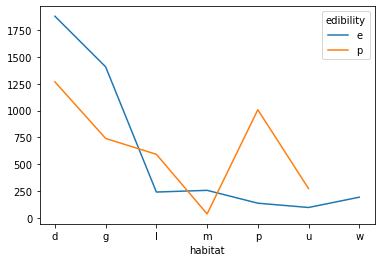

In [12]:
data.groupby(['habitat', 'edibility']).size().unstack().plot()

In [4]:
edible_habitats = defaultdict(int)
non_edible_habitats = defaultdict(int)

habitats = {'d': 'woods', 'g':'grass','m': 'meadows','l': 'leaves','p': 'paths','u': 'urban','w': 'waste'}

for index, row in data.iterrows():
    hab = habitats[row['habitat']]
    if row['edibility'] == 'e':
        edible_habitats[hab] += 1
    else:
        non_edible_habitats[hab] += 1

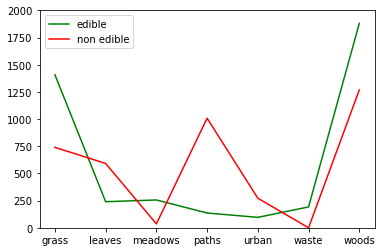

In [6]:
fig, ax = plt.subplots()
x, y = zip(*sorted(edible_habitats.items()))
plt.plot(x, y, c="green", label="edible")
non_edible_habitats[habitats['w']] = 0
x, y = zip(*sorted(non_edible_habitats.items()))
plt.plot(x, y, c="red", label="non edible")
plt.legend()
plt.ylim(0, 2000)
plt.show()

## Dummy variables

In [7]:
pd.get_dummies(data)

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Visualize feature space

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data)
vectors.shape

(23, 23)

Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
color    5
dtype: int64


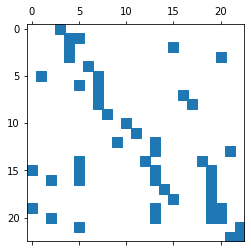

In [9]:
indices = np.argsort(data.columns)
print(data.columns)

freqs = vectors[indices].sum(axis=0)
i = np.argsort(freqs)
vocab = pd.Series(vectorizer.vocabulary_)
print(vocab[vocab.values==i[...,-1].item()])
 
plt.spy(vectors[indices])
fig = plt.gcf()
plt.plot()
plt.show()

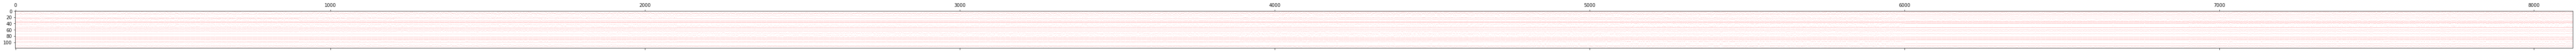

In [10]:
plt.spy(pd.get_dummies(data).T, markersize=0.02, c="red")
fig = plt.gcf()
fig.set_size_inches(100, 3)
plt.plot()
plt.show()